In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
Image_size=256
Batch_size=32
Channels= 3
Epochs=10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "PlantVillage",
    shuffle=True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size 
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

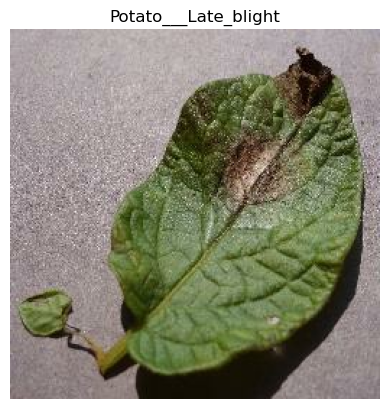

In [5]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

In [6]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1, shuffle =True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [7]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [8]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [9]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size, Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [11]:
input_shape = (Batch_size, Image_size, Image_size, Channels)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation ='relu',input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history=model.fit(
    train_ds,
    epochs=Epochs,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10


54/54 [==============================] - 46s 801ms/step - loss: 0.9083 - accuracy: 0.5122 - val_loss: 0.8155 - val_accuracy: 0.5833
Epoch 2/10
54/54 [==============================] - 41s 768ms/step - loss: 0.6264 - accuracy: 0.7182 - val_loss: 0.4917 - val_accuracy: 0.7604
Epoch 3/10
54/54 [==============================] - 42s 781ms/step - loss: 0.3990 - accuracy: 0.8328 - val_loss: 0.3487 - val_accuracy: 0.8802
Epoch 4/10
54/54 [==============================] - 47s 863ms/step - loss: 0.3010 - accuracy: 0.8791 - val_loss: 0.6283 - val_accuracy: 0.8125
Epoch 5/10
54/54 [==============================] - 40s 742ms/step - loss: 0.2512 - accuracy: 0.9028 - val_loss: 0.2627 - val_accuracy: 0.8802
Epoch 6/10
54/54 [==============================] - 37s 688ms/step - loss: 0.2230 - accuracy: 0.9155 - val_loss: 0.2983 - val_accuracy: 0.9010
Epoch 7/10
54/54 [==============================] - 36s 669ms/step - loss: 0.1794 - accuracy: 0.9329 - val_loss: 0.2128 - val_accuracy: 0.92

In [15]:
scores =model.evaluate(test_ds)

8/8 [==============================] - 2s 119ms/step - loss: 0.2350 - accuracy: 0.8984


In [16]:
scores


[0.23499876260757446, 0.8984375]

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

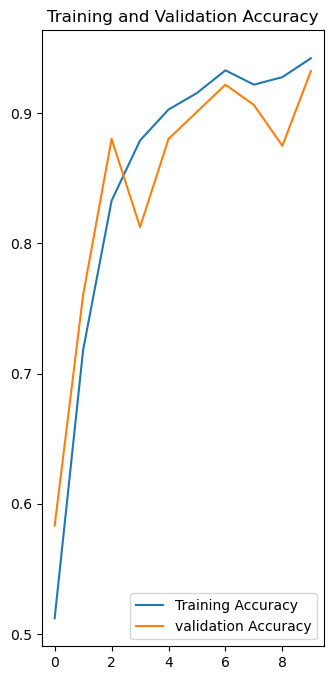

In [18]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc, label='Training Accuracy')
plt.plot(range(Epochs),val_acc, label='validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

first image's actual label:  Potato___Early_blight
1/1 [==============================] - 0s 133ms/step
predicted label:  Potato___Early_blight


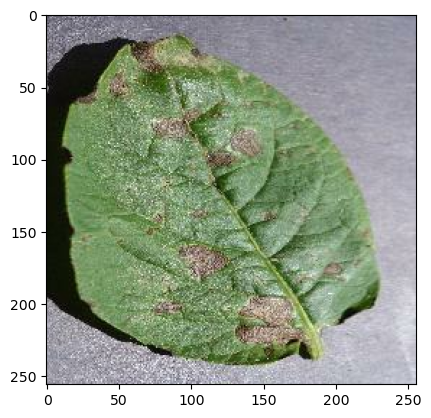

In [36]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    
    plt.imshow(first_image)
    print("first image's actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label: ",class_names[np.argmax(batch_prediction[0])])
    
    
                                              
                    

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 19ms/step


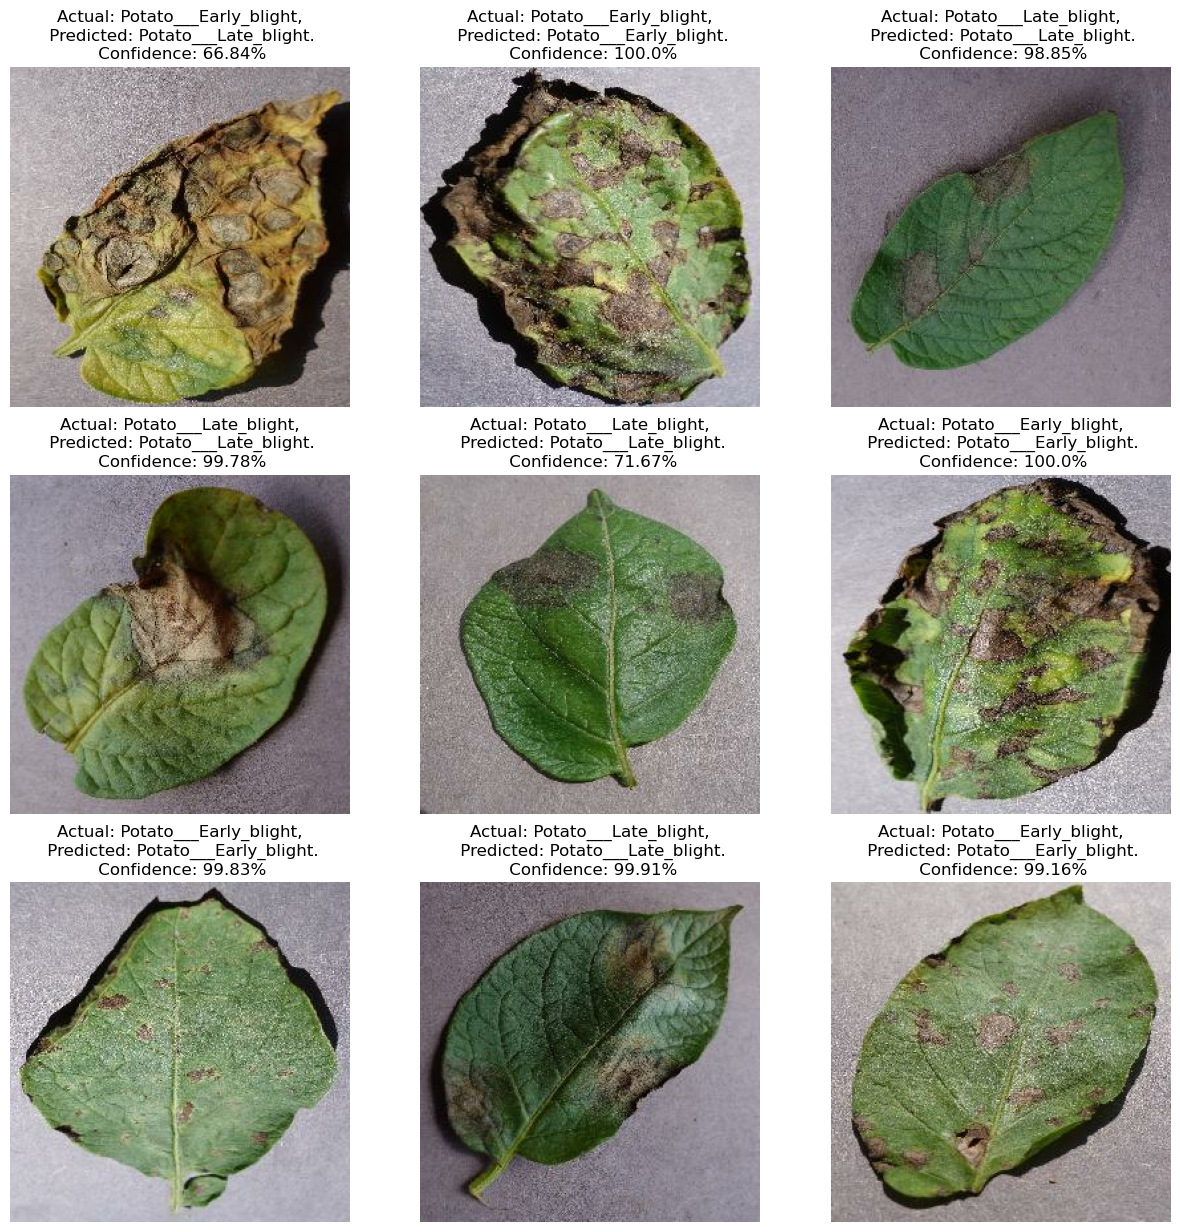

In [38]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [43]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets


In [44]:
model.save("../potatoes.h5")

C:\Users\aryan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
